# SDS1104X-E oscilloscope demo
---

In [1]:
import sys, os
sys.path.insert(0, r"C:\Users\dinod\Desktop\EE python\EE-python\Instruments")
%matplotlib widget
from pySDS1104XE.pySDS1104XE.core import SDS1104XE
import time
import matplotlib.pyplot as plt

import siglent_scpi

# 1. Connect
scope = SDS1104XE("TCPIP0::192.168.1.155::5025::SOCKET")


# 2. Identify & reset
print(scope.identify())


Siglent Technologies,SDS1104X-E,SDSMMGKC7R2239,8.3.6.1.37R10


## Acquisition and channel settings

In [4]:
scope.configure_acquisition(mode = "AVERAGE", average_count = 16)
scope.configure_acquisition() # Normal acquisiton 

In [5]:
scope.configure_channel(channel = 1, probe = 1, coupling = "D1M", range = 2, offset = 0, bw_limit = True, invert = False) 

## Time div and triggering

In [6]:
scope.set_time_div(5e-4)
scope.set_trigger_edge(source = "C1", slope = "POS")
scope.set_trigger_level(source = "C1", level = 0.0)
scope.set_trigger_mode("single")

'SINGLE'

## Pulling data from the SDS1104X-E

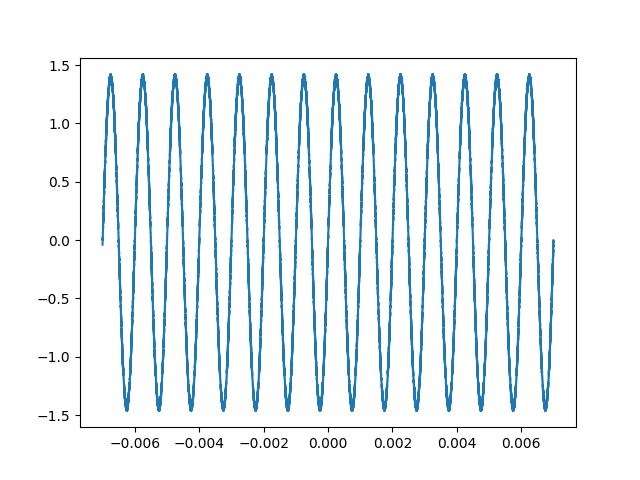

In [7]:
raw = scope.get_raw(1)
volts = scope.get_voltage(1)

t, v = scope.capture(1)

plt.plot(t, v)